# 1. Importação de Bibliotecas

In [35]:
import pandas as pd # Biblioteca para manipulação de dados
import numpy as np   # Biblioteca para operações numéricas

import matplotlib.pyplot as plt  # Biblioteca para visualização de dados
import seaborn as sns  # Biblioteca para visualização de dados

from collections import defaultdict  # Estrutura para agrupar itens em listas

from urllib.parse import quote_plus
import getpass
import urllib
from sqlalchemy import create_engine
import collections

# 2. Leitura e Explorando a tabela Dados Clientes

In [118]:
df_clientes = pd.read_csv(r"src/dados_clientes.csv", sep=';')  # Leitura do arquivo CSV de clientes

In [119]:
df_clientes.info()  # Exibe informações gerais sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238597 entries, 0 to 238596
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CD_CLIENTE              238597 non-null  object
 1   DS_PROD                 238597 non-null  object
 2   DS_LIN_REC              238597 non-null  object
 3   CIDADE                  238597 non-null  object
 4   DS_CNAE                 238597 non-null  object
 5   DS_SEGMENTO             238597 non-null  object
 6   DS_SUBSEGMENTO          238553 non-null  object
 7   FAT_FAIXA               238597 non-null  object
 8   MARCA_TOTVS             237693 non-null  object
 9   MODAL_COMERC            226965 non-null  object
 10  PAIS                    238597 non-null  int64 
 11  PERIODICIDADE           238531 non-null  object
 12  SITUACAO_CONTRATO       238096 non-null  object
 13  UF                      238597 non-null  object
 14  VL_TOTAL_CONTRATO       238597 non-n

# 3. Limpeza dos Dados

In [120]:
df_clientes_att = df_clientes.dropna()  # Remove linhas com valores ausentes
df_clientes_att.info()  # Exibe informações do DataFrame limpo

<class 'pandas.core.frame.DataFrame'>
Index: 226346 entries, 0 to 238596
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CD_CLIENTE              226346 non-null  object
 1   DS_PROD                 226346 non-null  object
 2   DS_LIN_REC              226346 non-null  object
 3   CIDADE                  226346 non-null  object
 4   DS_CNAE                 226346 non-null  object
 5   DS_SEGMENTO             226346 non-null  object
 6   DS_SUBSEGMENTO          226346 non-null  object
 7   FAT_FAIXA               226346 non-null  object
 8   MARCA_TOTVS             226346 non-null  object
 9   MODAL_COMERC            226346 non-null  object
 10  PAIS                    226346 non-null  int64 
 11  PERIODICIDADE           226346 non-null  object
 12  SITUACAO_CONTRATO       226346 non-null  object
 13  UF                      226346 non-null  object
 14  VL_TOTAL_CONTRATO       226346 non-null  

# 4. Filtragem por Segmento de Interesse

In [121]:
df_clientes_varejo = df_clientes_att[df_clientes_att.DS_SEGMENTO == 'SERVICOS']  # Seleciona apenas clientes do segmento 'SERVICOS'
df_clientes_att.shape, df_clientes_varejo.shape  # Mostra o tamanho dos DataFrames antes e depois do filtro

((226346, 16), (36424, 16))

# 5. Agrupamento de Produtos por Nicho

In [122]:
itens = df_clientes_varejo.DS_PROD.unique()  # Lista de produtos únicos

In [144]:
# Dicionário de nichos e palavras-chave associadas
nichos = {
    "SaaS": ["SAAS"],
    "Cloud": ["CLOUD", "CLOUDFICACAO"],
    "Consultoria": ["CONSULTORIA"],
    "Educação": ["EDUCACAO", "CURSOS"],
    "CRM": ["CRM"],
    "Financeiro / Techfin": ["TECHFIN", "RECEITA", "NFCE"],
    "Hardware": ["HARDWARE"],
    "Serviços Mensalizados": ["MENSALIZADOS"],
    "Integração / Plataforma": ["PLATAFORMA", "PVT", "CMNET"],
    "Inteligência de Mercado": ["INTELIGENCIA"]
}

agrupados = defaultdict(list)  # Dicionário para agrupar produtos por nicho

# Loop para classificar cada produto em um nicho
for item in itens:
    item_upper = item.upper()
    encontrado = False
    for nicho, palavras in nichos.items():
        if any(palavra in item_upper for palavra in palavras):
            agrupados[nicho].append(item)
            encontrado = True
            break
    if not encontrado:
        agrupados["Outros"].append(item)  # Produtos que não se encaixam em nenhum nicho vão para 'Outros'

# 6. Criação do DataFrame de Nichos

In [145]:
dados_nichos = []
for nicho, lista in agrupados.items():
    for segmento in lista:
        dados_nichos.append((segmento, nicho))  # Cria tuplas (produto, nicho)

df_nichos = pd.DataFrame(dados_nichos, columns=["DS_PROD", "NICHO"])  # DataFrame com produtos e seus nichos
df_clientes_varejo.DS_PROD.nunique(), df_nichos.shape  # Mostra quantidade de produtos únicos e tamanho do DataFrame de nichos


(3060, (3060, 2))

# 7. Junção dos Dados de Nicho ao DataFrame Principal

In [146]:
df_clientes_varejo_att = df_clientes_varejo.merge(df_nichos, how='left', on='DS_PROD')  # Junta os nichos ao DataFrame principal

# 8. Análise de Quantidade por Nicho

In [147]:
df_clientes_varejo_att.NICHO.value_counts().reset_index()  # Agrupa e conta clientes por nicho e trimestre

,NICHO,count
0,Outros,33264
1,Cloud,2005
2,Financeiro / Techfin,499
3,SaaS,270
4,CRM,214
5,Integração / Plataforma,167
6,Consultoria,3
7,Hardware,2


# 9. Visualização dos Dados Enriquecidos

In [148]:
df_clientes_varejo_att.head(10)  # Exibe as 10 primeiras linhas do DataFrame enriquecido

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO,NICHO
0,99958,SMS FULL TOTVS TRAD,SMS TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"1633817,36581438",2016-04-07,Outros
1,99958,CDU FULL TOTVS TRAD,CDU TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"42,0343698218297",2016-04-07,Outros
2,T00018,FEE - GDS INTERNACIONAL,RECEITA TRANSACIONAL,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",HOSPITALIDADE - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,"0,420385736791976",2002-01-01,Outros
3,T00018,ASSINATURA MENSAL INTERNET CMN,SERVICOS CMNET RESERVAS,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",HOSPITALIDADE - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,"0,739878896753878",2002-01-01,Outros
4,T00018,SMS LGT G. CAP HUMANO TRAD,SMS TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",RH - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,ATIVO,SP,"203,063126299996",2015-09-02,Outros
5,T00018,SMS LGT G. CAP HUMANO TRAD,SMS TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",RH - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SP,"0,0126115721037593",2015-09-02,Outros
6,T00018,FEE - GDS NACIONAL,RECEITA TRANSACIONAL,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",HOSPITALIDADE - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,"0,420385736791976",2002-01-01,Outros
7,99958,SMS FULL TOTVS ALUG,SAAS SMS ALUGUEL,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE ALUGUEL (LEGADO),105,00 - Mensal,GRATUITO,SC,"56,5544931706245",2016-04-07,Outros
8,T00361,PONTO DE VENDA POS > 1 ID,SAAS CMNET THEX,SAOPAULO,OUTRAS ATIVIDADES ASSOCIATIVAS PROFISSIONAIS,SERVICOS,PROVEDOR SERVICOS,Sem Informações de Faturamento,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,CANCELADO,SP,"222,682528636078",2021-10-14,Outros
9,T00018,SMS TOTVS TEC USER,SMS TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",TECNOLOGIA,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SP,"0,0210192868395988",2015-09-02,Outros


# 10. Análise de Quantidade por Nicho e Trimestre

In [149]:
df_clientes_varejo_att['QUARTER'] = pd.to_datetime(df_clientes_varejo_att.DT_ASSINATURA_CONTRATO).dt.quarter  # Extrai o trimestre da data de assinatura

In [150]:
df_clientes_varejo_att.groupby(['NICHO', 'QUARTER']).NICHO.value_counts().reset_index()  # Agrupa e conta clientes por nicho e trimestre

,NICHO,QUARTER,count
0,CRM,1,36
1,CRM,2,72
2,CRM,3,45
3,CRM,4,61
4,Cloud,1,429
5,Cloud,2,441
6,Cloud,3,472
7,Cloud,4,663
8,Consultoria,3,1
9,Consultoria,4,2


# 11. Alterando tipo dos dados

In [151]:
#tipos de dados
df_clientes_varejo_att['CD_CLIENTE'] = df_clientes_varejo_att['CD_CLIENTE'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['DS_PROD'] = df_clientes_varejo_att['DS_PROD'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['DS_LIN_REC'] = df_clientes_varejo_att['DS_LIN_REC'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['CIDADE'] = df_clientes_varejo_att['CIDADE'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['DS_CNAE'] = df_clientes_varejo_att['DS_CNAE'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['DS_SEGMENTO'] = df_clientes_varejo_att['DS_SEGMENTO'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['DS_SUBSEGMENTO'] = df_clientes_varejo_att['DS_SUBSEGMENTO'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['FAT_FAIXA'] = df_clientes_varejo_att['FAT_FAIXA'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['MARCA_TOTVS'] = df_clientes_varejo_att['MARCA_TOTVS'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['MODAL_COMERC'] = df_clientes_varejo_att['MODAL_COMERC'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['PERIODICIDADE'] = df_clientes_varejo_att['PERIODICIDADE'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['SITUACAO_CONTRATO'] = df_clientes_varejo_att['SITUACAO_CONTRATO'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['UF'] = df_clientes_varejo_att['UF'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['VL_TOTAL_CONTRATO'] = df_clientes_varejo_att['VL_TOTAL_CONTRATO'].str.replace(',','.', regex=False).astype(float).round(2)  # Converte coluna para tipo categórico
df_clientes_varejo_att['DT_ASSINATURA_CONTRATO'] = pd.to_datetime(df_clientes_varejo_att['DT_ASSINATURA_CONTRATO'])  # Converte coluna para tipo date
df_clientes_varejo_att['NICHO'] = df_clientes_varejo_att['NICHO'].astype('category')  # Converte coluna para tipo categórico

In [152]:
df_clientes_varejo_att.info() # Exibe informações do DataFrame enriquecido após conversões de tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36424 entries, 0 to 36423
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CD_CLIENTE              36424 non-null  string        
 1   DS_PROD                 36424 non-null  string        
 2   DS_LIN_REC              36424 non-null  string        
 3   CIDADE                  36424 non-null  category      
 4   DS_CNAE                 36424 non-null  category      
 5   DS_SEGMENTO             36424 non-null  string        
 6   DS_SUBSEGMENTO          36424 non-null  string        
 7   FAT_FAIXA               36424 non-null  string        
 8   MARCA_TOTVS             36424 non-null  string        
 9   MODAL_COMERC            36424 non-null  category      
 10  PAIS                    36424 non-null  int64         
 11  PERIODICIDADE           36424 non-null  string        
 12  SITUACAO_CONTRATO       36424 non-null  catego

In [153]:
df_clientes_varejo_att.head(2)

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO,NICHO,QUARTER
0,99958,SMS FULL TOTVS TRAD,SMS TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,1633817.37,2016-04-07,Outros,2
1,99958,CDU FULL TOTVS TRAD,CDU TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,42.03,2016-04-07,Outros,2


# 12. Removendo linhas duplicadas

In [154]:
duplicadas = df_clientes_varejo_att[df_clientes_varejo_att.duplicated(keep=False)]  # Identifica linhas duplicadas
duplicadas.shape  # Mostra o tamanho do DataFrame de linhas duplicadas

(207, 18)

In [155]:
duplicadas.head()  # Exibindo as linhas duplicadas

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO,NICHO,QUARTER
80,T00788,E-LEARNING CENTER,SAAS EDUCACAO CORPORATIVA,JAGUARIUNA,Desenvolvimento de programas de computador sob...,SERVICOS,PROVEDOR SERVICOS,Faixa 11 - Acima de 850 M,EDUCACIONAL - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,13.39,2014-01-22,Outros,1
117,T00788,SMS TOTVS TEC USER,SMS TOTVS SERIE T,JAGUARIUNA,Desenvolvimento de programas de computador sob...,SERVICOS,PROVEDOR SERVICOS,Faixa 11 - Acima de 850 M,TECNOLOGIA,MODALIDADE TRADICIONAL,105,00 - Mensal,ATIVO,SP,3.72,2022-07-29,Outros,3
134,T00788,E-LEARNING CENTER,SAAS EDUCACAO CORPORATIVA,JAGUARIUNA,Desenvolvimento de programas de computador sob...,SERVICOS,PROVEDOR SERVICOS,Faixa 11 - Acima de 850 M,EDUCACIONAL - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,13.39,2014-01-22,Outros,1
136,T00788,SMS TOTVS TEC USER,SMS TOTVS SERIE T,JAGUARIUNA,Desenvolvimento de programas de computador sob...,SERVICOS,PROVEDOR SERVICOS,Faixa 11 - Acima de 850 M,TECNOLOGIA,MODALIDADE TRADICIONAL,105,00 - Mensal,ATIVO,SP,3.72,2022-07-29,Outros,3
2298,T16221,SMS LGT MNT DE ATIVOS TRAD,SMS TOTVS SERIE T,RIODEJANEIRO,Aluguel de outras maquinas e equipamentos come...,SERVICOS,PROVEDOR SERVICOS,Faixa 06 - De 50 M ate 75 M,MANUFATURA - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,CANCELADO,RJ,287.28,2012-01-02,Outros,1


In [156]:
# Remover as duplicatas (mantendo a primeira ocorrência)
df_clientes_varejo_att = df_clientes_varejo_att.drop_duplicates(keep=False)  # Remove duplicatas

# 13. Investigação de outliers

### 13.1 Investigando VL_TOTAL_CONTRATO POR NICHO

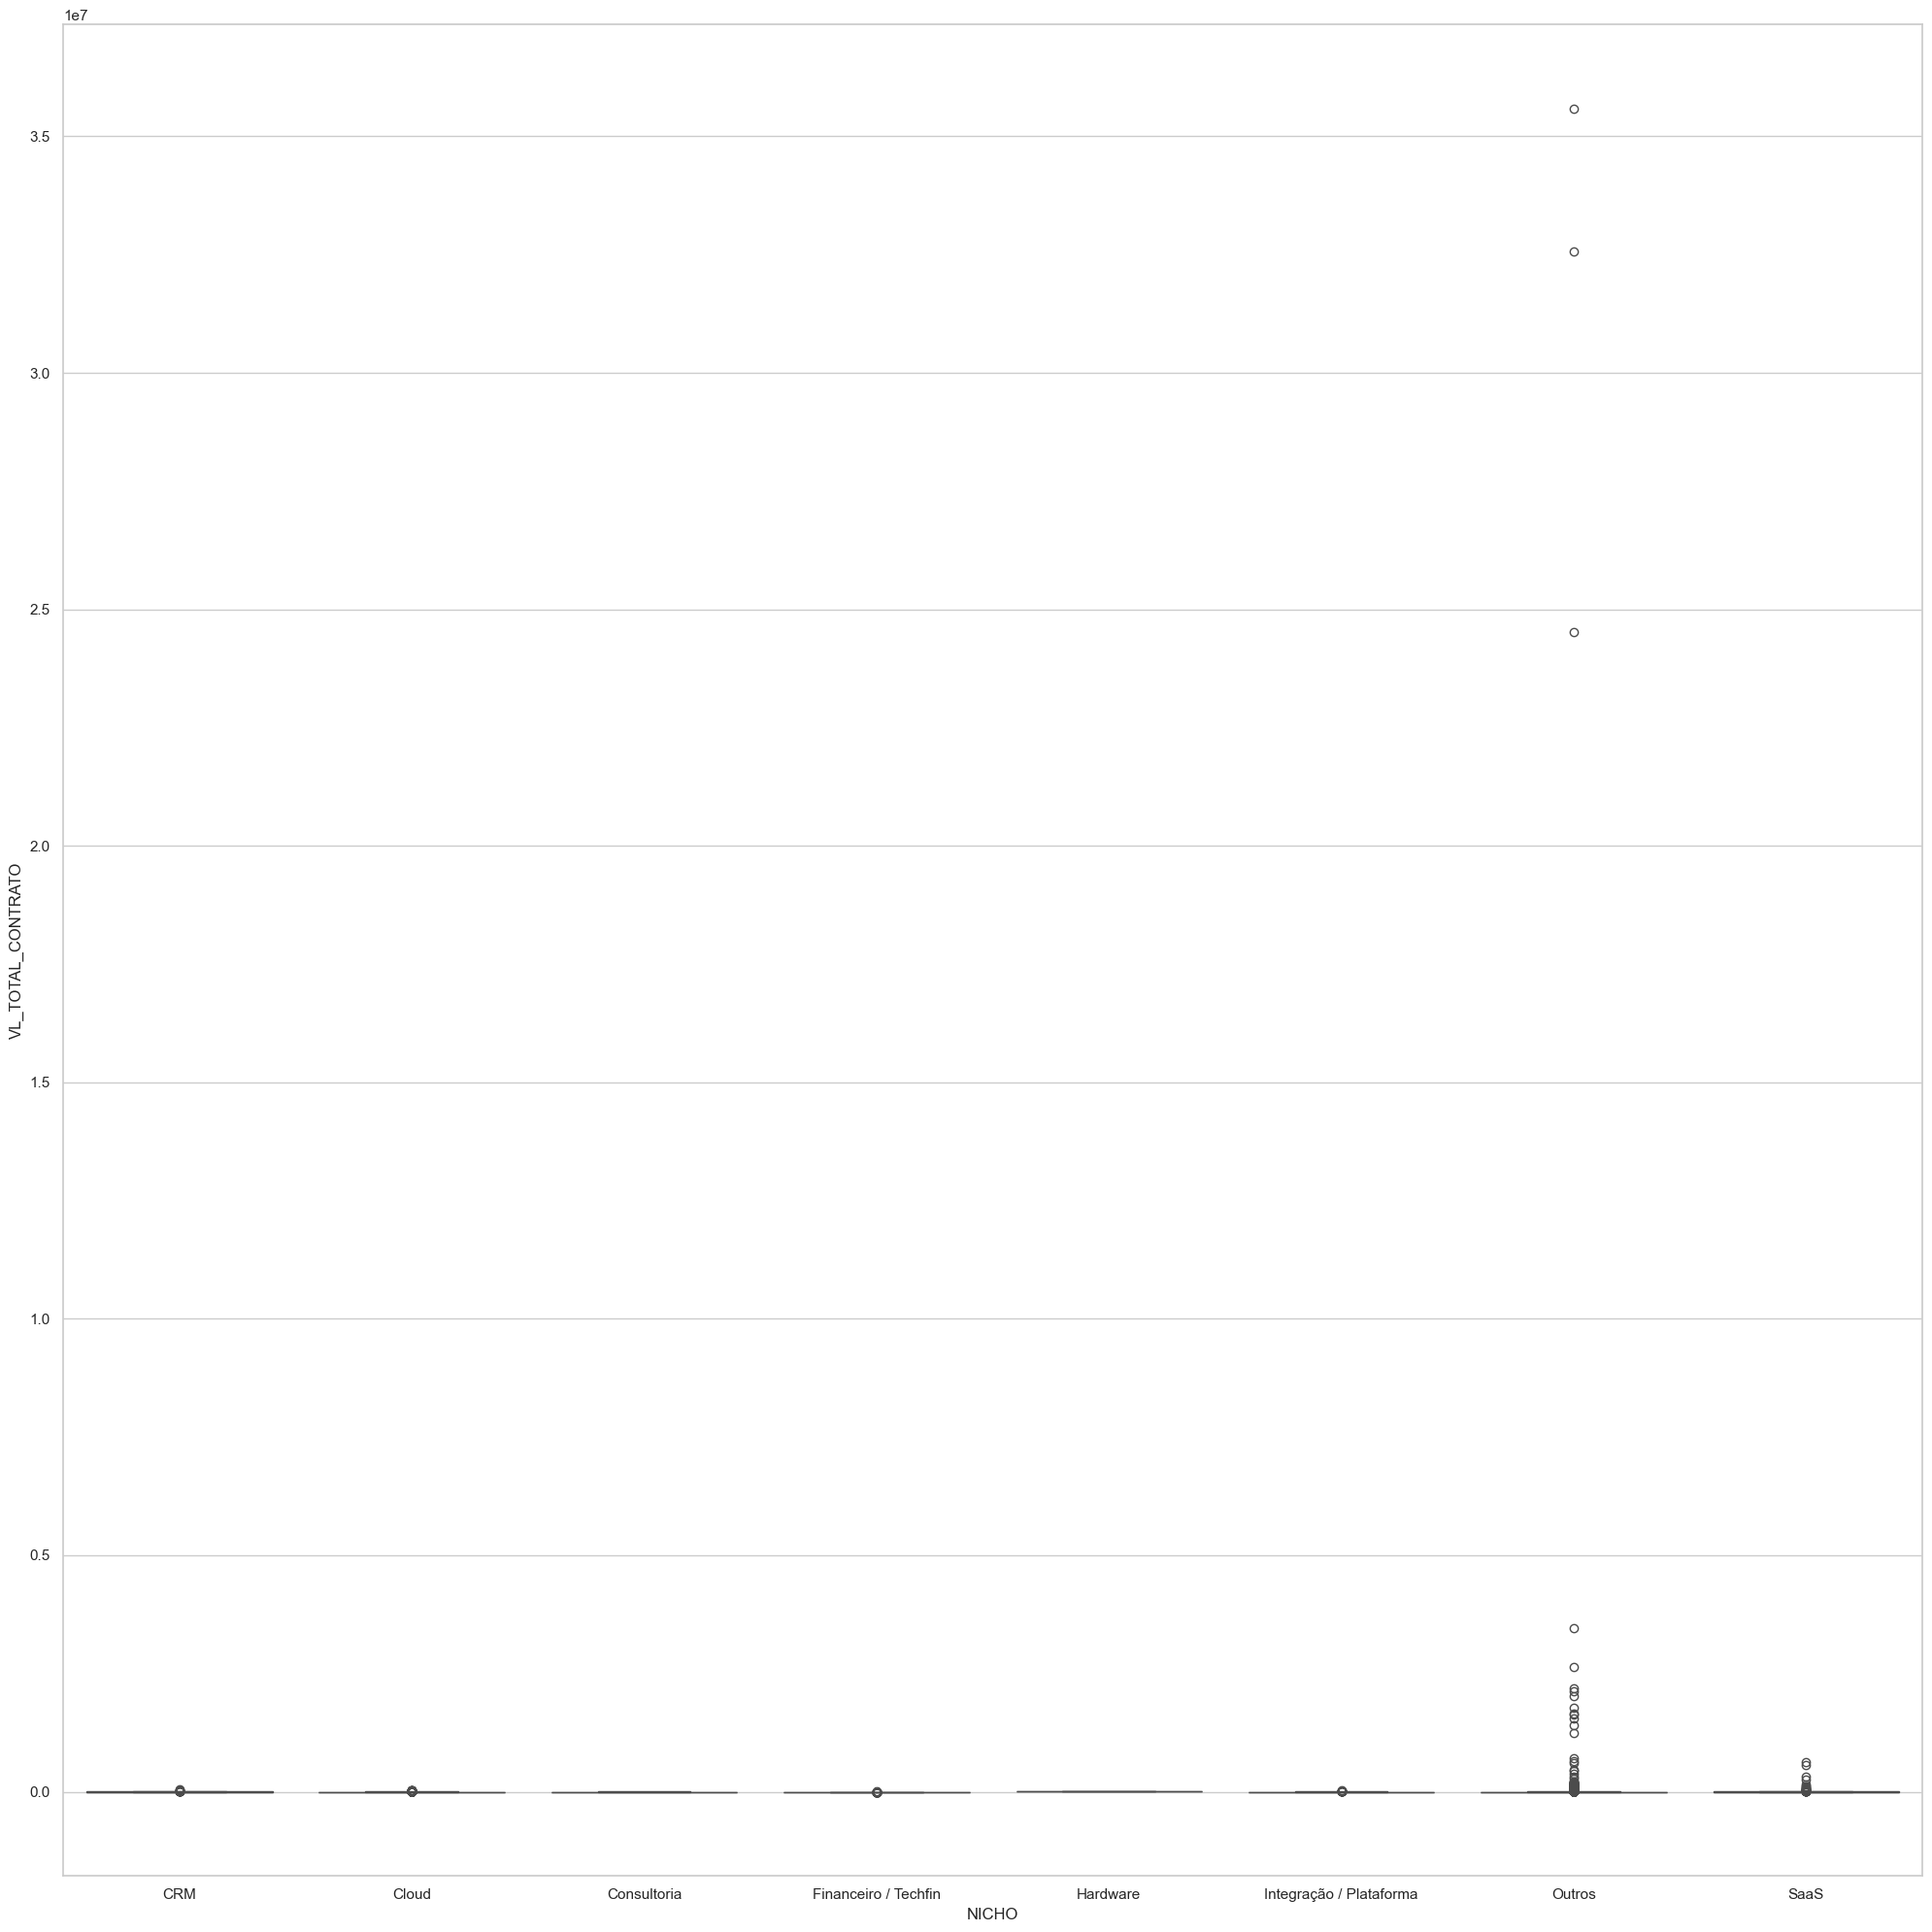

In [157]:
#carregar variaveis para plot
variaveis_numericas = df_clientes_varejo_att[['VL_TOTAL_CONTRATO','NICHO']]  # Lista de variáveis numéricas para plotagem

plt.rcParams["figure.figsize"] = [20.00, 20.00] # Parâmetro de tamanho da figura
plt.rcParams["figure.autolayout"] = True # Parâmetro de layout da figura

plt.rcParams['font.size'] = 10 # Parâmetro de tamanho da fonte
plt.rcParams['axes.titlesize'] = 20 # Parâmetro de tamanho do título dos eixos

sns.boxplot(data = variaveis_numericas, x='NICHO', y='VL_TOTAL_CONTRATO')  # Boxplot para o nicho

plt.show() # Exibir boxplot

### 13.2 Investigando VL_TOTAL_CONTRATO

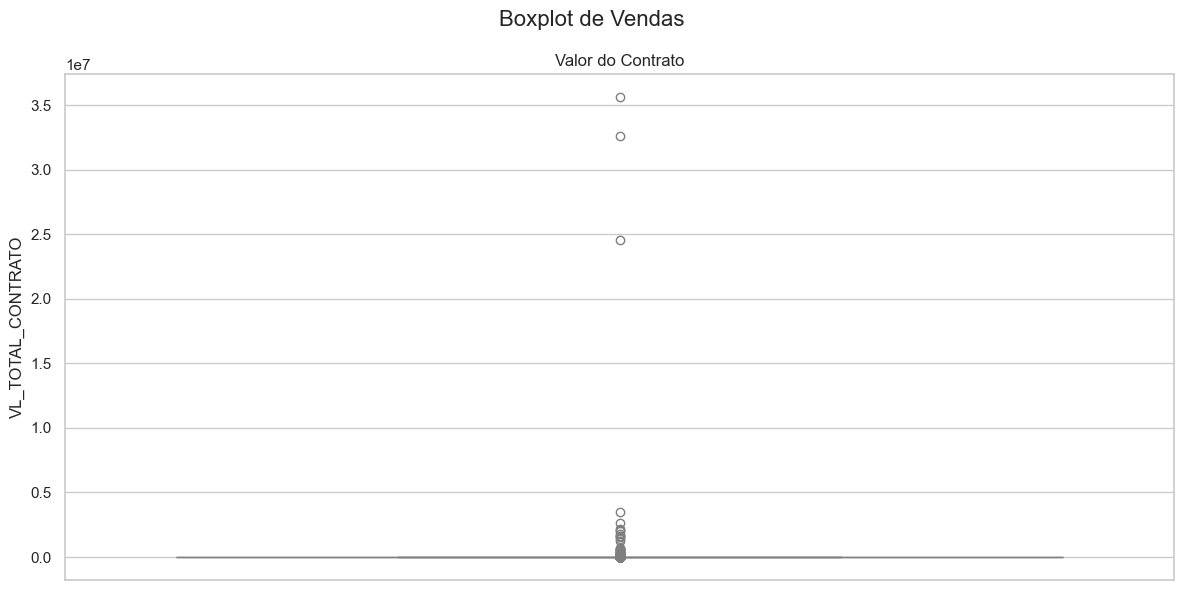

In [158]:
# Dados
valores = df_clientes_varejo_att["VL_TOTAL_CONTRATO"]

# Cálculo dos quartis e IQR
q1 = valores.quantile(0.25)
q2 = valores.quantile(0.50)
q3 = valores.quantile(0.75)
iqr = q3 - q1

lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr

# Definindo o estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotando
sns.boxplot(
    y=df_clientes_varejo_att['VL_TOTAL_CONTRATO'],
    color='lightgray'
)

# Parâmetros boxplot Antes da Remoção
plt.title('Valor do Contrato')

# Definindo o título geral
plt.suptitle('Boxplot de Vendas', fontsize=16)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [159]:
df_clientes_varejo_att['VL_TOTAL_CONTRATO'].describe()

count    3.621700e+04
mean     4.975089e+03
std      2.868281e+05
min      0.000000e+00
25%      4.000000e-02
50%      9.967000e+01
75%      7.711800e+02
max      3.558788e+07
Name: VL_TOTAL_CONTRATO, dtype: float64

### 13.3 Winsorizando coluna VL_TOTAL_CONTRATO

Após identificarmos uma grande disparidade nos valores extremos (outliers), optamos por aplicar o método de Winsorização, que tem como objetivo "achatar" os dados, reduzindo o impacto desses valores atípicos.

A Winsorização é uma técnica estatística de tratamento de outliers que substitui os valores muito baixos e muito altos por limites definidos com base em percentis. Isso reduz a influência dos extremos sem excluir registros do conjunto de dados.

Com essa abordagem, buscamos uma análise mais robusta e confiável, especialmente em medidas estatísticas sensíveis a outliers (como média, desvio padrão) e na preparação para modelos preditivos, que podem ser afetados por esses valores extremos.

In [160]:
from scipy.stats.mstats import winsorize

df_tratado = df_clientes_varejo_att.copy()  # Cria uma cópia do DataFrame original

# Winsorizando com limite inferior e superior de 2%
winsorize(df_tratado['VL_TOTAL_CONTRATO'], limits=[0.02, 0.02])

masked_array(data=[1.639504e+04, 4.203000e+01, 4.200000e-01, ...,
                   0.000000e+00, 0.000000e+00, 0.000000e+00],
             mask=False,
       fill_value=1e+20)

### 13.4 Comparação entre antes e depois da winsorização

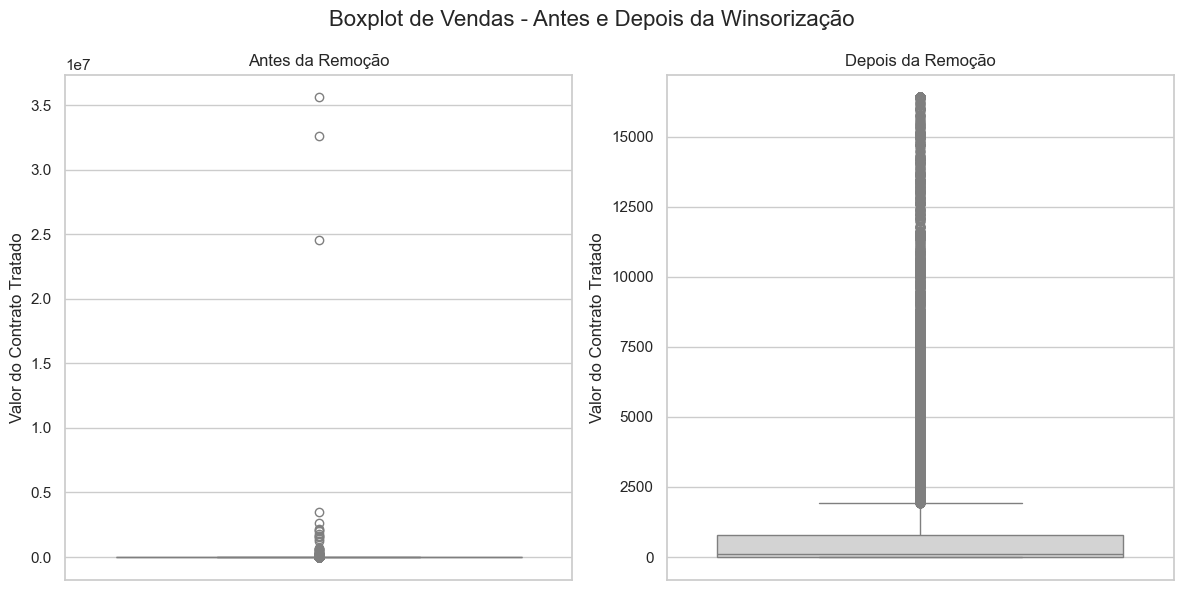

In [161]:
# Definindo o estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


# Plotando lado a lado
plt.subplot(1, 2, 1)
sns.boxplot(
    y=df_clientes_varejo_att['VL_TOTAL_CONTRATO'],
    color='lightgray'
)

# Parâmetros boxplot Antes da Remoção
plt.title('Antes da Remoção')
plt.ylabel('Valor do Contrato Tratado')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.boxplot(
    y=df_tratado['VL_TOTAL_CONTRATO'], 
    color='lightgray'
)

# Parâmetros boxplot Depois da Remoção
plt.title('Depois da Remoção')
plt.ylabel('Valor do Contrato Tratado')
plt.xlabel('')

# Definindo o título geral
plt.suptitle('Boxplot de Vendas - Antes e Depois da Winsorização', fontsize=16)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [162]:
df_clientes_varejo_att['VL_TOTAL_CONTRATO'].describe()

count    3.621700e+04
mean     4.975089e+03
std      2.868281e+05
min      0.000000e+00
25%      4.000000e-02
50%      9.967000e+01
75%      7.711800e+02
max      3.558788e+07
Name: VL_TOTAL_CONTRATO, dtype: float64

In [163]:
df_tratado['VL_TOTAL_CONTRATO'].describe()

count    36217.000000
mean      1214.332225
std       3009.569157
min          0.000000
25%          0.040000
50%         99.670000
75%        771.180000
max      16395.040000
Name: VL_TOTAL_CONTRATO, dtype: float64

# 14. Leitura e Explorando a tabela Histórico

In [164]:
# Importando tabela histórico
df_historico = pd.read_csv(r"src/historico.csv", sep=';')  # Leitura do arquivo CSV de histórico
df_historico.info()  # Exibe informações gerais sobre o DataFrame
df_historico.sample(5) #Exibindo tabela histórico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22740 entries, 0 to 22739
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NR_PROPOSTA             22740 non-null  object
 1   ITEM_PROPOSTA           22740 non-null  int64 
 2   DT_UPLOAD               22740 non-null  object
 3   HOSPEDAGEM              22740 non-null  object
 4   CD_CLI                  22740 non-null  object
 5   FAT_FAIXA               22740 non-null  object
 6   CD_PROD                 22740 non-null  object
 7   QTD                     22740 non-null  object
 8   MESES_BONIF             22740 non-null  int64 
 9   VL_PCT_DESC_TEMP        22740 non-null  object
 10  VL_PCT_DESCONTO         22740 non-null  object
 11  PRC_UNITARIO            22740 non-null  object
 12  VL_DESCONTO_TEMPORARIO  22740 non-null  object
 13  VL_TOTAL                22740 non-null  object
 14  VL_FULL                 22740 non-null  object
 15  VL

,NR_PROPOSTA,ITEM_PROPOSTA,DT_UPLOAD,HOSPEDAGEM,CD_CLI,FAT_FAIXA,CD_PROD,QTD,MESES_BONIF,VL_PCT_DESC_TEMP,VL_PCT_DESCONTO,PRC_UNITARIO,VL_DESCONTO_TEMPORARIO,VL_TOTAL,VL_FULL,VL_DESCONTO
6529,AAJVVS,1,2024-03-26,ON PREMISES,T62472,Faixa 11 - Acima de 850 M,1113001031-7,22,0,0,"17,7865205236685","135,570196258044",0,"2982,54431767698","5169,90379106772","2187,35947339075"
13360,AAKFYA,1,2024-05-15,ON PREMISES,TEZJGM,"Faixa 00 - Ate 4,5 M",1113101000-8,1,0,0,0,"227,685118903902",0,"227,685118903902","227,685118903902",0
14386,AALQ28,1,2024-11-27,ON PREMISES,TFDPJI,"Faixa 01 - De 4,5 M ate 7,5 M",2010067-2,56,0,0,0,"89,1806302030498",0,"4994,18255308867","4994,11529137079",0
7025,AALXWX,1,2024-12-23,ON PREMISES,TEZEYE,Faixa 03 - De 15 M ate 25 M,CONSV.452,1,0,0,0,"8489,17708391507",0,"8489,17708391507","8407,71473583952",0
13691,AAMFDO,1,2025-01-26,ON PREMISES,TEYIZV,Faixa 07 - De 75 M ate 150 M,1131001509,1,0,0,0,"12603,1770005955",0,"12603,1770005955","12603,1770005955",0


# 15. Alterando o tipo de dados

In [165]:
# Alterando tipos de dados
df_historico['NR_PROPOSTA'] = df_historico['NR_PROPOSTA'].astype('category')
df_historico['ITEM_PROPOSTA'] = df_historico['ITEM_PROPOSTA'].astype(int)
df_historico['DT_UPLOAD'] = pd.to_datetime(df_historico['DT_UPLOAD'])
df_historico['HOSPEDAGEM'] = df_historico['HOSPEDAGEM'].astype('string')  
df_historico['CD_CLI'] = df_historico['CD_CLI'].astype('category')
df_historico['FAT_FAIXA'] = df_historico['FAT_FAIXA'].astype('string')  
df_historico['CD_PROD'] = df_historico['CD_PROD'].astype('category')
df_historico['QTD'] = df_historico['QTD'].str.replace(',','.', regex=False).astype(float).round(1)
df_historico['MESES_BONIF'] = df_historico['MESES_BONIF'].astype(int)
df_historico['VL_PCT_DESC_TEMP'] = df_historico['VL_PCT_DESC_TEMP'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['VL_PCT_DESCONTO'] = df_historico['VL_PCT_DESCONTO'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['PRC_UNITARIO'] = df_historico['PRC_UNITARIO'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['VL_DESCONTO_TEMPORARIO'] = df_historico['VL_DESCONTO_TEMPORARIO'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['VL_TOTAL'] = df_historico['VL_TOTAL'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['VL_FULL'] = df_historico['VL_FULL'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['VL_DESCONTO'] = df_historico['VL_DESCONTO'].str.replace(',','.', regex=False).astype(float).round(2)

In [166]:
df_historico.info()  # Exibe informações do DataFrame após conversão de tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22740 entries, 0 to 22739
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   NR_PROPOSTA             22740 non-null  category      
 1   ITEM_PROPOSTA           22740 non-null  int64         
 2   DT_UPLOAD               22740 non-null  datetime64[ns]
 3   HOSPEDAGEM              22740 non-null  string        
 4   CD_CLI                  22740 non-null  category      
 5   FAT_FAIXA               22740 non-null  string        
 6   CD_PROD                 22740 non-null  category      
 7   QTD                     22740 non-null  float64       
 8   MESES_BONIF             22740 non-null  int64         
 9   VL_PCT_DESC_TEMP        22740 non-null  float64       
 10  VL_PCT_DESCONTO         22740 non-null  float64       
 11  PRC_UNITARIO            22740 non-null  float64       
 12  VL_DESCONTO_TEMPORARIO  22740 non-null  float6

# 16. Analisando Missings / Valores Nulos

In [167]:
df_historico.isnull().sum()  # Verifica valores nulos em cada coluna

NR_PROPOSTA               0
ITEM_PROPOSTA             0
DT_UPLOAD                 0
HOSPEDAGEM                0
CD_CLI                    0
FAT_FAIXA                 0
CD_PROD                   0
QTD                       0
MESES_BONIF               0
VL_PCT_DESC_TEMP          0
VL_PCT_DESCONTO           0
PRC_UNITARIO              0
VL_DESCONTO_TEMPORARIO    0
VL_TOTAL                  0
VL_FULL                   0
VL_DESCONTO               0
dtype: int64

# 17. Identificando linhas duplicadas

In [168]:
duplicadas_hist = df_historico[df_historico.duplicated(keep=False)]  # Identifica linhas duplicadas
duplicadas_hist.shape # Mostra o tamanho do DataFrame de linhas duplicadas

(0, 16)

# 18. Identificando Outliers

ITEM_PROPOSTA : int64
QTD : float64
MESES_BONIF : int64
VL_PCT_DESC_TEMP : float64
VL_PCT_DESCONTO : float64
PRC_UNITARIO : float64
VL_DESCONTO_TEMPORARIO : float64
Coluna: ITEM_PROPOSTA
  Limite inferior: -3.5
  Limite superior: 8.5

Coluna: QTD
  Limite inferior: -18.5
  Limite superior: 33.5

Coluna: MESES_BONIF
  Limite inferior: 0.0
  Limite superior: 0.0

Coluna: VL_PCT_DESC_TEMP
  Limite inferior: 0.0
  Limite superior: 0.0

Coluna: VL_PCT_DESCONTO
  Limite inferior: -6.300000000000001
  Limite superior: 10.5

Coluna: PRC_UNITARIO
  Limite inferior: -916.93
  Limite superior: 1592.6699999999998

Coluna: VL_DESCONTO_TEMPORARIO
  Limite inferior: 0.0
  Limite superior: 0.0



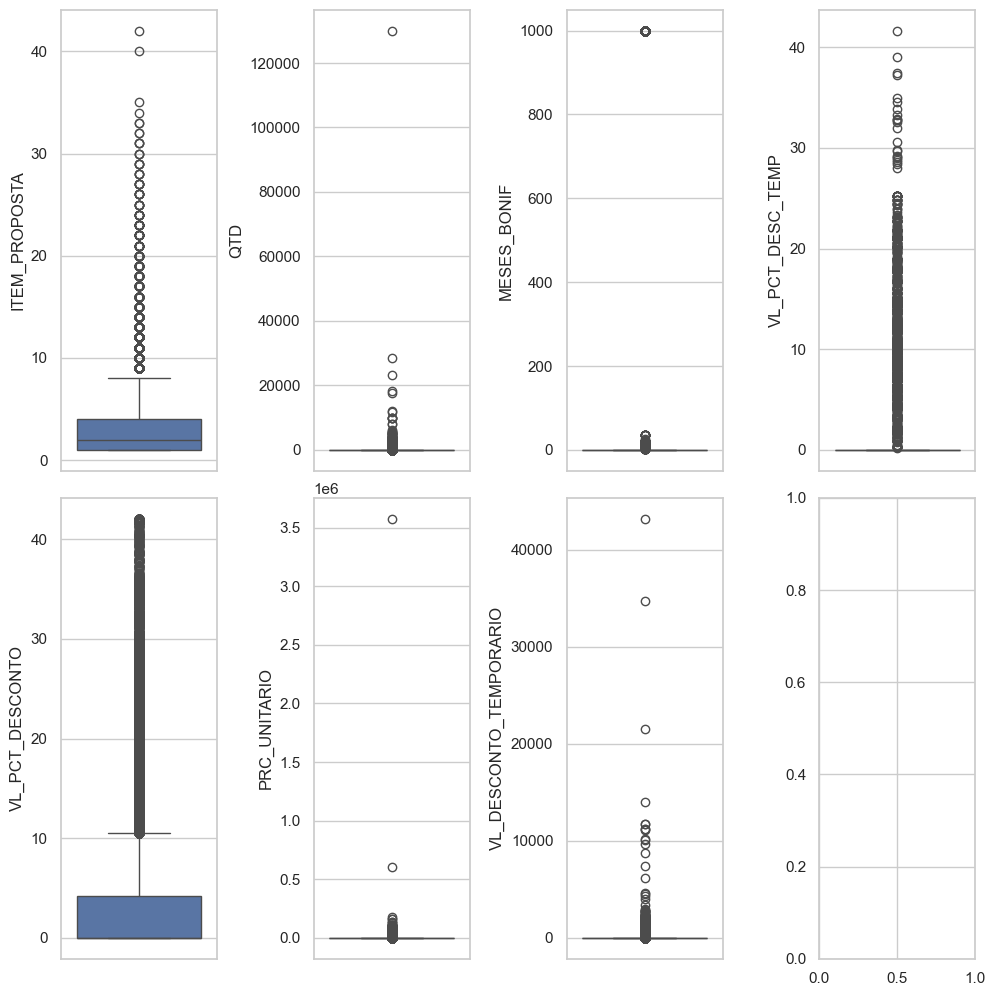

In [169]:
# Loop for para carregar variáveis 
variaveis_numericas = []
for i in df_historico.columns[0:13].tolist():
        if df_historico.dtypes[i] == 'int64' or df_historico.dtypes[i] == 'float64':            
            print(i, ':' , df_historico.dtypes[i]) 
            variaveis_numericas.append(i)
  
    
# Definindo parâmetros do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 8 
plt.rcParams['axes.titlesize'] = 15

f, axes = plt.subplots(2,4) #2 linhas e 4 colunas

# Loop para criar boxplots para cada variável numérica
linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_historico, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0   

# Loop para calcular limites inferior e superior para cada variável numérica
for coluna in variaveis_numericas:
    Q1 = df_historico[coluna].quantile(0.25)
    Q3 = df_historico[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f'Coluna: {coluna}')
    print(f'  Limite inferior: {limite_inferior}')
    print(f'  Limite superior: {limite_superior}\n')

# Exibindo o gráfico
plt.show() 

# 19. Definindo os Outliers com o algoritmo K-Nearest Neighbors (KNN)


O KNN pode ser utilizado para detecção e tratamento de outliers com base na ideia de proximidade entre amostras. 

Dessa forma, o KNN pode ser utilizado para identificar outliers em um conjunto de dados, considerando a distância entre os pontos e a densidade local. O algoritmo calcula a distância entre um ponto e seus vizinhos mais próximos e, se essa distância for maior do que um determinado limiar, o ponto é considerado um outlier.

Escolhemos este algoritmo para essas váriaveis por ser simples de implementar e facilitará a identificação de outliers para essas varáveis definidas.

In [170]:
from pyod.models.knn import KNN # Importando o algoritmo KNN

In [171]:
# Instanciando o objeto KNN
detector = KNN()

# Treinando um detector de OUTLIERS
detector.fit(df_historico[variaveis_numericas])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [172]:
# A propiedade LABELS_ retorna um ARRAY com 0 e 1
# 0 significa que NÃO é outlier
# 1 significa que É outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0], shape=(22740,))

In [173]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([20467,  2273]))

In [174]:
# Observando o calculo da distancia realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([ 3.53      ,  0.29      ,  2.54472002, ...,  1.38621788,
       10.82151561,  1.        ], shape=(22740,))

In [175]:
# Criando uma lista somente com os outliers
outliers = []
for i in range(len(previsoes)):
    #print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [176]:
# Exibindo lista com os ID´s dos registros que foram considerados OUTLIERS
print(outliers)

# Exibindo o tamanho da lista de outliers
print(f'\nQuantidade de outliers: {len(outliers)}')

[11, 16, 18, 33, 41, 85, 105, 128, 133, 141, 152, 165, 167, 182, 183, 191, 192, 218, 229, 230, 231, 254, 271, 281, 289, 327, 345, 347, 360, 373, 383, 400, 424, 427, 428, 437, 450, 453, 461, 474, 503, 508, 513, 551, 561, 566, 578, 615, 623, 630, 636, 640, 650, 667, 688, 692, 699, 708, 729, 730, 731, 735, 742, 752, 767, 769, 797, 842, 866, 875, 888, 907, 913, 937, 954, 963, 976, 978, 983, 991, 995, 1013, 1020, 1027, 1045, 1052, 1072, 1083, 1097, 1100, 1103, 1114, 1119, 1138, 1162, 1167, 1180, 1190, 1192, 1236, 1239, 1240, 1247, 1266, 1267, 1268, 1277, 1289, 1291, 1310, 1327, 1340, 1354, 1367, 1369, 1371, 1380, 1387, 1410, 1413, 1415, 1424, 1425, 1428, 1443, 1446, 1455, 1464, 1468, 1472, 1482, 1490, 1504, 1505, 1534, 1535, 1539, 1549, 1573, 1594, 1608, 1617, 1623, 1627, 1639, 1645, 1656, 1678, 1697, 1698, 1699, 1703, 1705, 1713, 1737, 1777, 1783, 1784, 1789, 1792, 1795, 1807, 1808, 1817, 1837, 1844, 1850, 1852, 1882, 1884, 1893, 1901, 1940, 1949, 1958, 1992, 1993, 2002, 2006, 2017, 2021, 

In [177]:
# Fazendo um SLICE no arquivo original filtrando todas as linhas que são outliers (lista de outliers) e todas colunas
lista_outliers = df_historico[variaveis_numericas].iloc[outliers,:]
lista_outliers

,ITEM_PROPOSTA,QTD,MESES_BONIF,VL_PCT_DESC_TEMP,VL_PCT_DESCONTO,PRC_UNITARIO,VL_DESCONTO_TEMPORARIO
11,11,1.0,0,0.00,17.27,7243.58,0.00
16,7,12200.0,0,0.00,41.24,0.00,0.00
18,12,12.0,999,17.66,0.00,293.67,1480.11
33,1,1.0,0,0.00,0.00,63484.80,0.00
41,1,1.0,0,0.00,0.00,46803.79,0.00
...,...,...,...,...,...,...,...
22706,1,1.0,0,0.00,17.66,7379.44,0.00
22712,1,1.0,0,0.00,0.00,6911.19,0.00
22728,1,4.0,999,13.05,0.00,432.07,536.37
22733,5,500.0,18,16.82,0.00,0.77,153.86


In [178]:
lista_outliers.shape # Exibindo o tamanho do DataFrame de outliers

(2273, 7)

# 20. Winsorizando os dados

In [179]:
cols_to_winsorize = df_historico[variaveis_numericas] # Selecionando colunas numéricas para winsorização

# Função para aplicar winsorização em uma série
def winsorize_series(series, limits=[0.05, 0.05]): # Limites padrão de 5% para cada extremidade
    return winsorize(series, limits=limits)

# Loop para aplicar winsorização em cada coluna selecionada
for col in cols_to_winsorize:
    df_historico[col] = winsorize_series(df_historico[col])

df_historico.describe()  # Exibe estatísticas descritivas das colunas após winsorização

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4842: UserWa

,ITEM_PROPOSTA,DT_UPLOAD,QTD,MESES_BONIF,VL_PCT_DESC_TEMP,VL_PCT_DESCONTO,PRC_UNITARIO,VL_DESCONTO_TEMPORARIO,VL_TOTAL,VL_FULL,VL_DESCONTO
count,22740.000000,22740,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,2.274000e+04,2.274000e+04,22740.000000
mean,2.855893,2024-09-20 22:30:23.746701568,27.152309,72.860510,0.802291,4.082079,846.299263,6.606668,4.105135e+03,3.947741e+03,810.021677
min,1.000000,2024-03-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.760000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,2024-06-25 00:00:00,1.000000,0.000000,0.000000,0.000000,24.170000,0.000000,1.117075e+02,6.011000e+01,0.000000
50%,2.000000,2024-09-27 00:00:00,1.000000,0.000000,0.000000,0.000000,105.100000,0.000000,5.187850e+02,3.817500e+02,0.000000
75%,4.000000,2024-12-27 00:00:00,14.000000,0.000000,0.000000,4.200000,651.570000,0.000000,2.352753e+03,2.273967e+03,21.020000
max,10.000000,2025-03-25 00:00:00,250.000000,999.000000,10.510000,24.830000,6053.550000,96.690000,3.573279e+06,2.962229e+06,374796.760000
std,2.532352,NaN,61.672463,259.232024,2.636283,7.744145,1610.465205,22.997578,3.443398e+04,2.563757e+04,6124.934331


In [180]:
df_historico[variaveis_numericas].shape # Exibe o tamanho do DataFrame após winsorização

(22740, 7)

# 21. Exibindo os dados tratados 

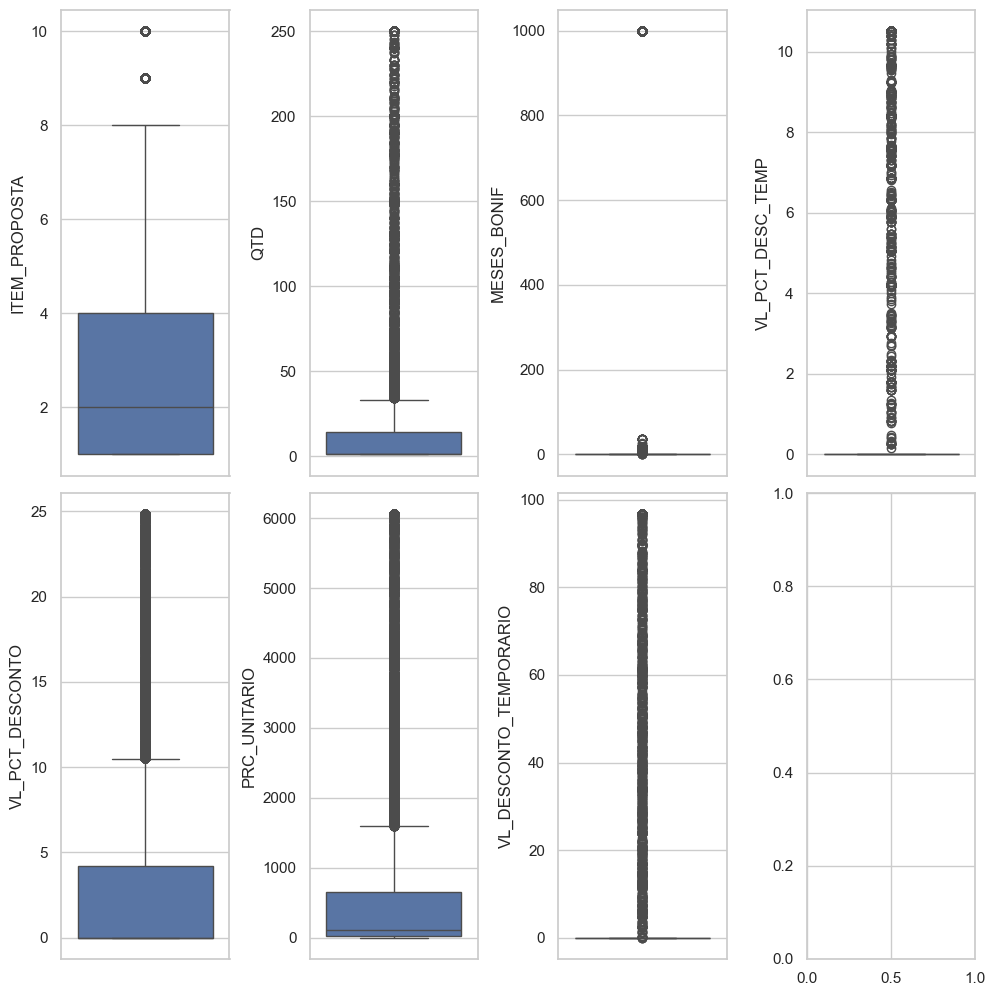

In [181]:
# Parâmetros do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 8 
plt.rcParams['axes.titlesize'] = 15

f, axes = plt.subplots(2,4) #2 linhas e 4 colunas

# Loop para criar boxplots para cada variável numérica após winsorização
linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_historico, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0   

# Exibindo o gráfico
plt.show()

In [182]:
#somando toda a coluna VL_TOTAL_CONTRATO
df_tratado['VL_TOTAL_CONTRATO'].sum()  # Soma total da coluna 'VL_TOTAL_CONTRATO'

np.float64(43979470.18)

# 22. Conectando ao banco de dados

In [207]:
#Coleta informações que necessitamos para gerar a conexão com o banco Azure
userDBAzure = getpass.getpass(prompt='Azure_Username: ')
passwordDBAzure = getpass.getpass(prompt='Azure_Password: ')
password_encoded = quote_plus(passwordDBAzure)
server = "ukysynserver.database.windows.net"
db = "ukysyndb"

In [208]:
#Cria os parâmetros para geração da engine de conexão
params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    f"SERVER={server};"
    f"DATABASE={db};"
    f"UID={userDBAzure};"
    f"PWD={password_encoded};"
)

# Cria a engine de conexão com o banco de dados
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

In [209]:
#Realiza o teste de conexão
try:
    conn = engine.connect()
    print('Conexão estabelecida!')
    conn.close()
except Exception as e:
    print(f'Ocorreu um erro. Erro: {e}')

Conexão estabelecida!


# 21. Inserindo os dados tratados no banco de dados

In [210]:
#Cria uma função genérica de inserção para ser usada na inserção de dados das dimensões
def insert_data(df, table):
    print(f"Começando o processo de inserção para a tabela {table}!")
    try:
        conn = engine.connect()
        trans = conn.begin()
        df.to_sql(table, con=conn, if_exists='replace', index=False)
        print(f"Inserção concluída com sucesso!")
        trans.commit()
        conn.close()
    except Exception as e:
        trans.rollback()
        print(f"Ocorreu um erro. Erro: {e}")

In [211]:
#Inserindo a tabela dados clientes após tratamento como SPRINT2_VAREJO
insert_data(df_tratado, 'SPRINT2_VAREJO')

Começando o processo de inserção para a tabela SPRINT2_VAREJO!


Inserção concluída com sucesso!


In [161]:
#Inserindo a tabela histórico após tratamento como SPRINT2_HISTORICO
insert_data(df_historico, 'SPRINT2_HISTORICO')

Começando o processo de inserção para a tabela SPRINT2_HISTORICO!
Inserção concluída com sucesso!
